# Euler–Bernoulli Beam Theory

$$EI\frac{d^4\phi}{dx^4}=q(x)$$


$E$ = Young’s modulus

$I$ = Area moment of inertia

$q(x)$ = Load per unit length

for steal $EI$(Specific flexural-rigidity) $= 8.33\times 10^5 Pa \cdot m^2$

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [13]:
def dSdx(S, x, sfr):
    phi1, phi2, phi3, phi4 = S
    # assume uniform load q0 = 1000 N/m for example
    q0 = 1000.0
    return [
        phi2,               # d(phi1)/dx = phi2
        phi3,               # d(phi2)/dx = phi3
        phi4,               # d(phi3)/dx = phi4
        q0/sfr              # d(phi4)/dx = q(x)/EI
    ]


In [14]:
sfr = 8.33e5   # EI (flexural rigidity)
S0 = [0, 0, 0, 0]   # initial guesses (you’ll adjust for BCs)
x = np.linspace(0, 3, 200)   # beam length 3m

solution = odeint(dSdx, S0, x, args=(sfr,))
phi1, phi2, phi3, phi4 = solution.T


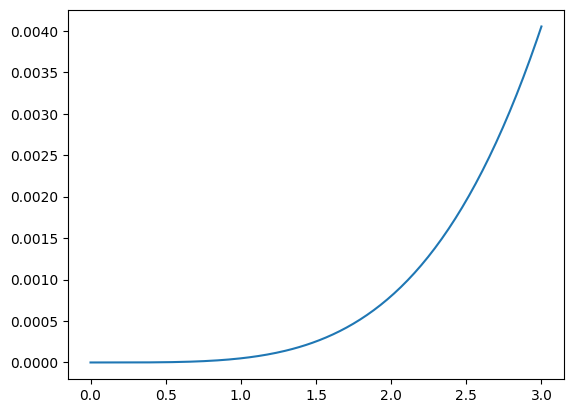

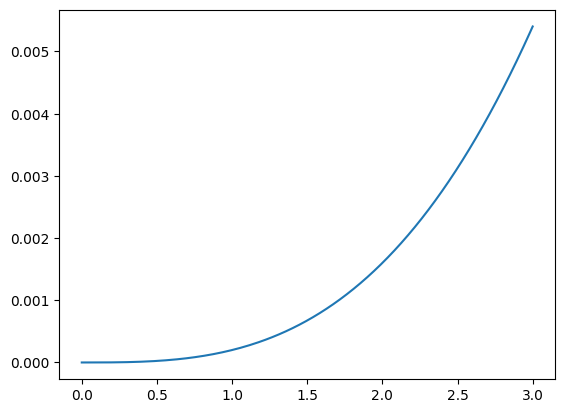

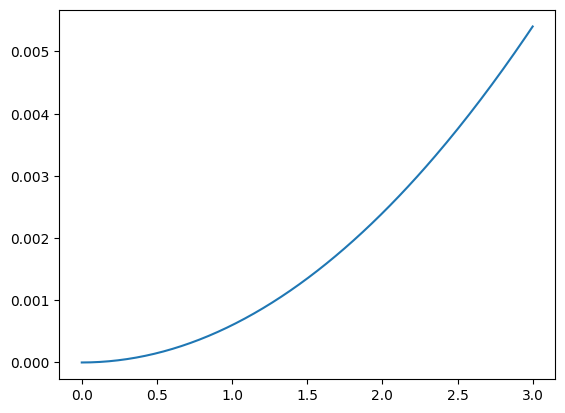

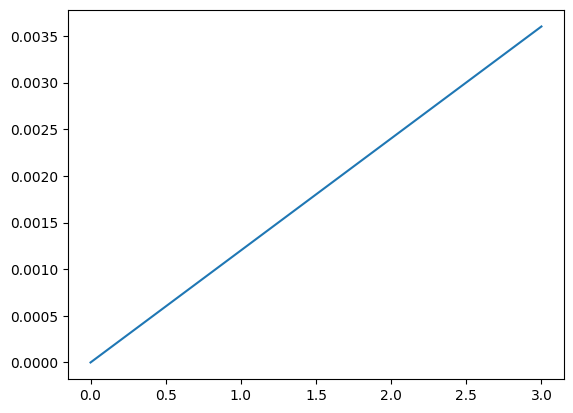

In [24]:
for i in solution.T:
    phi = [phi1, phi2, phi3, phi4]
    plt.plot(x,i)
    plt.show()

In [25]:
import sympy as smp

In [27]:
x, E, I = smp.symbols('x E I')
phi = smp.Function('phi')(x)
q = smp.Function('q')(x)

In [29]:
eqn = smp.Eq(E*I*smp.diff(smp.diff(smp.diff(smp.diff(phi,x),x),x),x),q)

In [30]:
print(smp.dsolve(eqn, phi))

Eq(phi(x), C1 + x**3*(C4 + Integral(q(x), x)/(6*E*I)) + x**2*(C3 - Integral(x*q(x), x)/(2*E*I)) + x*(C2 + Integral(x**2*q(x), x)/(2*E*I)) - Integral(x**3*q(x), x)/(6*E*I))
